# Movie Recommendation System

In [4]:
#import the libraries
import pandas as pd  #pandas is used for reading the data set
import numpy as np   #numpy is used for creating multi dimensional array

In [5]:
#Read the file which contains information like user id,movie id,rating and timestamp.Here user id is information of unique users who are giving some ratings to movies of some specific movie id)
ratings=pd.read_csv("ratings.csv")
ratings.head()

,user_id,movie_id,rating,timestamp
0,172,94969,5.0,1396067836
1,172,98956,4.0,1396067879
2,176,73881,4.0,1499807147
3,221,1900,4.5,1288550866
4,333,33688,4.0,1412015122


In [6]:
#Another dataset contains the mapping information of movie_id and title of the movie
#Check all the movies and their respective ids
movie_titles=pd.read_csv("titles.csv")
movie_titles.head()


,movie_id,title
0,139,Target (1995)
1,568,Bhaji on the Beach (1993)
2,1900,Children of Heaven The (Bacheha-Ye Aseman) (1...
3,2284,Bandit Queen (1994)
4,5985,Asoka (Ashoka the Great) (2001)


In [8]:
#Merge two dataframe to create single data frame by using merge method from dataframe
ratings_movie=pd.merge(ratings,movie_titles,on='movie_id').drop(['timestamp'],axis=1)
ratings_movie.head()


,user_id,movie_id,rating,title
0,172,94969,5.0,Kahaani (2012)
1,2419,94969,3.0,Kahaani (2012)
2,9168,94969,1.0,Kahaani (2012)
3,9303,94969,3.0,Kahaani (2012)
4,9535,94969,4.0,Kahaani (2012)


Exploratory data analysis

In [9]:
#import necessary libraries
import matplotlib.pyplot as plt #matplotlib and seaborn is used for visualization purpose
import seaborn as sbs
sbs.set_style('white')
%matplotlib inline

Create a ratings dataframe with average rating and number of ratings.

In [10]:
ratings_movie.groupby('title')['rating'].mean().sort_values(ascending=False).head() #ascending=False means data will be sorted in descending order


title
Shor in the City (2011)             5.00
Hooligan (1998)                     5.00
Humpty Sharma Ki Dulhania (2014)    5.00
Samay: When Time Strikes (2003)     5.00
Hichki (2018)                       4.75
Name: rating, dtype: float64

In [11]:
#create a dataframe for how many numbers of rating are given with respect to the movies
ratings_movie.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
3 Idiots (2009)                                       1394
Children of Heaven  The (Bacheha-Ye Aseman) (1997)     900
Namesake  The (2006)                                   581
Bhaji on the Beach (1993)                              396
PK (2014)                                              392
Name: rating, dtype: int64

In [12]:
ratings_df=pd.DataFrame(ratings_movie.groupby('title')['rating'].mean())
ratings_df.head()

,rating
title,
100 Days (1991),1.000
1920 (2008),3.000
1920: Evil Returns (2012),2.000
1942: A Love Story (1994),2.500
2 States (2014),3.125


In [13]:
#set the number of ratings column
ratings_df['number of ratings']=pd.DataFrame(ratings_movie.groupby('title')['rating'].count())
ratings_df.head()

,rating,number of ratings
title,,
100 Days (1991),1.000,1
1920 (2008),3.000,10
1920: Evil Returns (2012),2.000,5
1942: A Love Story (1994),2.500,5
2 States (2014),3.125,16


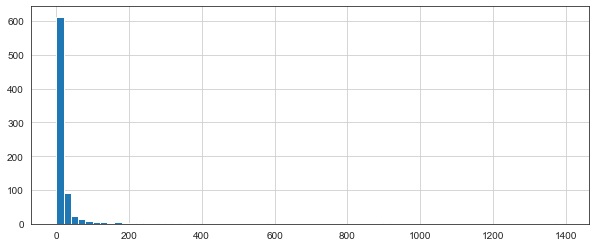

In [73]:
plt.figure(figsize=(10,4))
ratings_df['number of ratings'].hist(bins=70) #number of ratings are distributed as seen in graph below

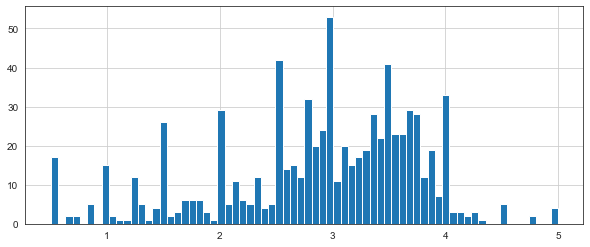

In [74]:
#creating histogram with respect to ratings
plt.figure(figsize=(10,4))
ratings_df['rating'].hist(bins=70)

Recommending similar movies

In [14]:
user_ratings=ratings_movie.pivot_table(index=['user_id'],columns=['title'],values='rating')
user_ratings.head()

title,100 Days (1991),1920 (2008),1920: Evil Returns (2012),1942: A Love Story (1994),2 States (2014),3 A.M (2014),3 Idiots (2009),36 China Town (2006),404: Error Not Found (2011),7 Khoon Maaf (2011),...,Youngistaan (2014),Yuva (2004),Zakhm (1998),Zameen (2003),Zanjeer (1973),Zeher (2005),Zid (2014),Zindagi Na Milegi Dobara (2011),Zokkomon (2011),road (2002)
user_id,,,,,,,,,,,,,,,,,,,,,
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings_df.sort_values('number of ratings',ascending=False).head(15)

,rating,number of ratings
title,,
3 Idiots (2009),3.928623,1394
Children of Heaven The (Bacheha-Ye Aseman) (1997),3.991667,900
Namesake The (2006),3.700516,581
Bhaji on the Beach (1993),3.553030,396
PK (2014),3.762755,392
Bandit Queen (1994),3.706494,385
Salaam Bombay! (1988),3.857735,362
The Lunchbox (2013),3.863636,352
Like Stars on Earth (Taare Zameen Par) (2007),4.000000,316


In [19]:
#Drop few movies from dataframe which have less than 5 users who rated it .
user_rate=user_ratings.dropna(thresh=5,axis=1).fillna(0) #All nan values replaced by zeros
user_rate.head()

title,1920 (2008),1920: Evil Returns (2012),1942: A Love Story (1994),2 States (2014),3 Idiots (2009),36 China Town (2006),7 Khoon Maaf (2011),Aaja Nachle (2007),Aakrosh (2010),Aalavandhan (2001),...,Wanted (2009),Waqt: The Race Against Time (2005),War and Peace (Jang Aur Aman) (2001),Welcome (2007),Yaadein (2001),Yeh Jawaani Hai Deewani (2013),Yuva (2004),Zameen (2003),Zanjeer (1973),Zindagi Na Milegi Dobara (2011)
user_id,,,,,,,,,,,,,,,,,,,,,
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Consider any three movies.For 
Ex:Aakrosh ,3 Idiots and LunchBox

In [77]:
ratings_df.head()

,rating,number of ratings
title,,
100 Days (1991),1.000,1
1920 (2008),3.000,10
1920: Evil Returns (2012),2.000,5
1942: A Love Story (1994),2.500,5
2 States (2014),3.125,16


In [17]:
#Take the user ratings for these movies
aakrosh_user_rating=user_ratings['Aakrosh (2010)']
three_idiots_user_rating=user_ratings['3 Idiots (2009)']
lb_user_rating=user_ratings['The Lunchbox (2013)']
aakrosh_user_rating.head()

user_id
172    NaN
176    NaN
221    NaN
333    5.0
339    NaN
Name: Aakrosh (2010), dtype: float64

In [20]:
#Similarity matrix.To get correlations between two panda series use corrwith() method.
similarity=user_rate.corrwith(aakrosh_user_rating)
similar_to_three_idiots=user_rate.corrwith(three_idiots_user_rating)
similar_to_lb=user_rate.corrwith(lb_user_rating)

In [81]:
corr_aakrosh_movie=pd.DataFrame(similarity,columns=['Correlation'])
#Remove NAN values 
corr_aakrosh_movie.dropna(inplace=True)
corr_aakrosh_movie.head()

,Correlation
title,
1920 (2008),0.205305
1920: Evil Returns (2012),-0.013291
1942: A Love Story (1994),-0.019070
2 States (2014),-0.044005
3 Idiots (2009),-0.173286


Filtering the movie which have less than 100 reviews

In [84]:
corr_aakrosh_movie.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Aakrosh (2010),1.000000
Good Boy Bad Boy (2007),0.382137
Dabangg 2 (2012),0.380650
Kick (2014),0.378790
Aitraaz (2004),0.378790
Dhamaal (2007),0.378790
Newton (2017),0.378136
Paa (2009),0.377973
Kapoor and Sons (2016),0.377973


In [85]:
corr_aakrosh_movie = corr_aakrosh_movie.join(ratings_df['number of ratings'])
corr_aakrosh_movie.head()

,Correlation,number of ratings
title,,
1920 (2008),0.205305,10
1920: Evil Returns (2012),-0.013291,5
1942: A Love Story (1994),-0.019070,5
2 States (2014),-0.044005,16
3 Idiots (2009),-0.173286,1394


In [86]:
corr_aakrosh_movie[corr_aakrosh_movie['number of ratings']>100].sort_values('Correlation',ascending=False).head() #sort the values if the number of ratings is greater than 100

,Correlation,number of ratings
title,,
Children of Heaven The (Bacheha-Ye Aseman) (1997),0.252527,900
Dangal (2016),0.252527,177
Gangs of Wasseypur (2012),0.211100,167
The Lunchbox (2013),0.140634,352
Sometimes Happiness Sometimes Sorrow (Kabhi Khushi Kabhie Gham) (2001),0.104477,129


In [96]:
corr_three_idiots = pd.DataFrame(similar_to_three_idiots,columns=['Correlation'])
corr_three_idiots.dropna(inplace=True)
corr_three_idiots = corr_three_idiots.join(ratings_df['number of ratings'])
corr_three_idiots[corr_three_idiots['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
3 Idiots (2009),1.000000,1394
Like Stars on Earth (Taare Zameen Par) (2007),0.173937,316
PK (2014),0.152719,392
Paint It Yellow (Rang De Basanti) (2006),0.114138,231
My Name is Khan (2010),0.107943,295


The above output indicates that if the user watches 3 idiots movie then the next movie recommended for that user is Taare Zameen Par based on correlation value.Similarly all movies will be recommended based on correlation value.This correlation value is the correlation of all the movies with the movie the user is watching(i,e here 3 idiots) where number of ratings is greater than 100.

In [21]:
corr_lb = pd.DataFrame(similar_to_lb,columns=['Correlation'])
corr_lb.dropna(inplace=True)
corr_lb = corr_lb.join(ratings_df['number of ratings'])
corr_lb[corr_lb['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
The Lunchbox (2013),1.000000,352
Namesake The (2006),0.070812,581
Asoka (Ashoka the Great) (2001),0.063205,113
PK (2014),0.060576,392
Jab We Met (2007),0.059138,137


In this system,the movie is recommended based on the correlation value. Correlation value is the correlation of all the movies with the movie the user is watching.The movie with the next higher correlation value is recommended.